In [1]:
from numpy.random import default_rng
import numpy as np
import matplotlib.pyplot as plt
import math

In [21]:
rng = default_rng()

dimensions=[1,2,3,5,10,50]
distances=[]
for dim in dimensions:
    mean=np.zeros(dim)
    cov=np.identity(dim)
    x=rng.multivariate_normal(mean, cov, 10000)
    y=np.linalg.norm(x, axis=1)
    distances.append(y)

distances=np.array(distances)
print(distances.shape)
    


(6, 10000)


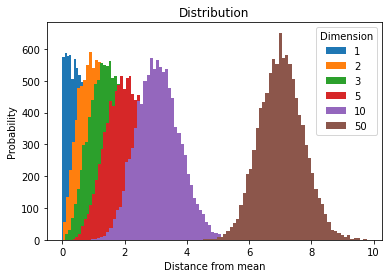

In [24]:
for i in range(6):
    plt.hist(distances[i],bins=50, label=dimensions[i])

plt.legend(title='Dimension')
plt.xlabel('Distance from mean')
plt.ylabel('Probability')
plt.title('Distribution')
plt.show()

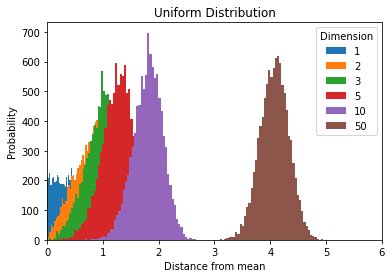

In [49]:
rng = default_rng()

dimensions=[1,2,3,5,10,50]
distances=[]
for dim in dimensions:
    x=rng.uniform(-1,1, 10000*dim).reshape(-1,dim)
    y=np.linalg.norm(x, axis=1)
    distances.append(y)

distances=np.array(distances)
for i in range(6):
    plt.hist(distances[i],bins=50, label=dimensions[i])

plt.legend(title='Dimension', loc=1)
plt.xlabel('Distance from mean')
plt.ylabel('Probability')
plt.title('Uniform Distribution')
plt.xlim([0,6])
plt.show()


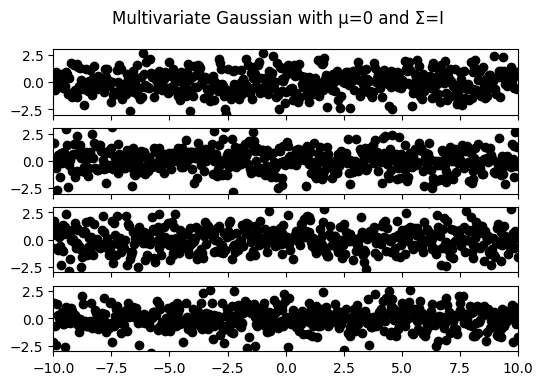

In [58]:
rng = default_rng()
dim=500
mean=np.zeros(dim)
cov=np.identity(dim)

x=np.linspace(-10, 10, 500)
y=rng.multivariate_normal(mean, cov, 4)

fig, axis=plt.subplots(4, sharex=True, dpi=100)

for i in range(4):
    axis[i].scatter(x, y[i], color='black')
    axis[i].set_ylim([-3, 3])
    axis[i].set_xlim([-10, 10])

fig.suptitle('Multivariate Gaussian with μ=0 and Σ=I')
plt.show()

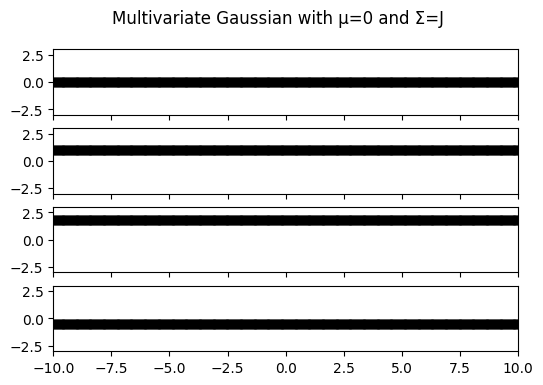

In [59]:
rng = default_rng()
dim=500
mean=np.zeros(dim)
cov=np.ones((dim,dim))

x=np.linspace(-10, 10, 500)
y=rng.multivariate_normal(mean, cov, 4)

fig, axis=plt.subplots(4, sharex=True, dpi=100)

for i in range(4):
    axis[i].scatter(x, y[i], color='black')
    axis[i].set_ylim([-3, 3])
    axis[i].set_xlim([-10, 10])

fig.suptitle('Multivariate Gaussian with μ=0 and Σ=J')
plt.show()

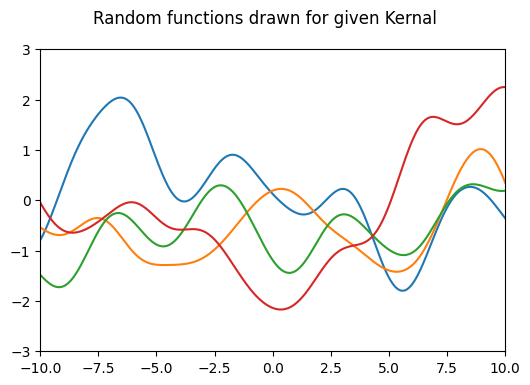

In [64]:
dim=500
mean=np.zeros(dim)
x=np.linspace(-10, 10, 500)
cov=np.zeros((dim,dim))
h=5
for i in range(len(x)):
    for j in range(len(x)):
        cov[i][j]=math.exp(-((x[i]-x[j])**2)/h)

        
y=rng.multivariate_normal(mean, cov, 4)
fig, axis=plt.subplots(dpi=100)
fig.suptitle('Random functions drawn for given Kernal')
for i in range(4):
    axis.plot(x, y[i])
    axis.set_ylim([-3,3])
    axis.set_xlim([-10, 10])
plt.show()



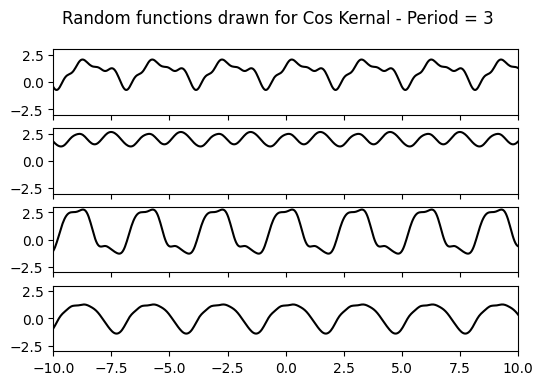

In [85]:
dim=500
mean=np.zeros(dim)
x=np.linspace(-10, 10, 500)
cov=np.zeros((dim,dim))
h=5
for i in range(len(x)):
    for j in range(len(x)):
        
        cov[i][j]=math.exp(math.cos((2*math.pi/3) *(x[i]-x[j])))

        
y=rng.multivariate_normal(mean, cov, 4)
fig, axis=plt.subplots(4, sharex=True, dpi=100)
fig.suptitle('Random functions drawn for Cos Kernal - Period = 3')
for i in range(4):
    axis[i].plot(x, y[i], color='black')
    axis[i].set_ylim([-3,3])
    axis[i].set_xlim([-10, 10])
plt.show()



In [86]:
from scipy.stats import multivariate_normal

x_train = np.array([-6, 0, 7])
y_train = np.array([3, -2, 2])
mu_n = np.zeros(500)
mu_m = np.ones(3)
x=np.linspace(-10, 10, 500)

def K(X1, X2):
    
def periodic_K(X1, X2):
    k = np.zeros((X1.shape[0], X2.shape[0]))
    for i, t in enumerate(X1):
        for j, t in enumerate(X2):
            k[i][j]=np.exp(-(2*np.square(np.sin((X1[i]-X2[j])/2))/9))
    return k


# In[25]:


K_periodic11 = periodic_K(x,x)
K_periodic12 = periodic_K(x,x_train)
K_periodic21 = periodic_K(x_train,x)
K_periodic22 = periodic_K(x_train, x_train)
K_1 = np.concatenate((K_periodic11, K_periodic12), axis=1)
K_2 = np.concatenate((K_periodic21, K_periodic22), axis=1)
K_periodic = np.concatenate((K_1, K_2), axis=0)


# In[26]:


mu_periodic = mu_n + K_periodic12@np.linalg.inv(K_periodic22)@(y_train - mu_m)
sigma_periodic = K_periodic11 - K_periodic12@np.linalg.inv(K_periodic22)@K_periodic21


# In[27]:


fig = plt.figure(figsize = (15,10))
for _ in range(4):
    y = multivariate_normal.rvs(mu_periodic, sigma_periodic)
    plt.ylabel('Function Value', size=17)
    plt.xlabel('$x_i$', size=20)
    plt.title('Four Random Functions', size=20)
    plt.plot(x, y, '-')
    plt.plot(x_train,y_train, 'ro', markersize=9)    
# plt.savefig('./figures/part_x_all4.png', bbox_inches='tight')


# mean_posterior = K12@np.linalg.inv(K22)@y_train
mean_periodic_posterior = K_periodic12@np.linalg.inv(K_periodic22)@y_train


# In[31]:

fig = plt.figure(figsize = (12,8))
y = multivariate_normal.rvs(mean_periodic_posterior, sigma_periodic)
plt.ylabel('Function Value', size=17)
plt.xlabel('x', size=20)
plt.title('Mean Function', size=20)
plt.plot(x, y)

IndentationError: expected an indented block (3835415339.py, line 11)